# Un-supervised learning

## Clustering Algorithms

1. KMeans
2. Hierarchical clustering

### KMeans Clustering

Partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean.

    Choose number of clusters (Within center sum of squares to find the optimum number of clusters)
    Select at random k points, centroids
    Assign each data point to the centroid
    Compute the new centroid for each cluster
    Re-assign each data point to new centroid, if reassignment took place - go to step 4 else, finish


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

iris = pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


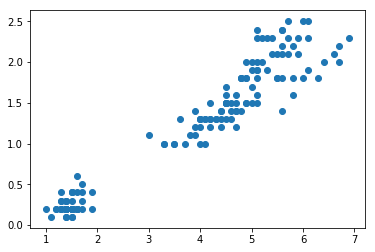

In [153]:
plt.scatter(iris['petal_length'], iris['petal_width'])

### Understanding Clustering with toy dataset

In [2]:
# import modules
from sklearn.cluster import KMeans
from sklearn import datasets 

In [32]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X[:5, :]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [33]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
# create an instance
kmeans = KMeans(n_clusters=3, random_state=0)

In [6]:
# fit the model
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [7]:
# view the data labels after clustering
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [8]:
# view the cluster centers
kmeans.cluster_centers_  #coordinate of centers

array([[ 5.9016129 ,  2.7483871 ,  4.39354839,  1.43387097],
       [ 5.006     ,  3.418     ,  1.464     ,  0.244     ],
       [ 6.85      ,  3.07368421,  5.74210526,  2.07105263]])

#### Visualise the clusters

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# create a array for label colors
colors = ['red', 'blue', 'green']

In [11]:
# assign color to each cluster
pred_colors = [colors[label] for label in kmeans.labels_]

In [12]:
# assign color to existing labels
actual_colors = [colors[label] for label in y]

In [13]:
pred_colors[:5]

['blue', 'blue', 'blue', 'blue', 'blue']

#### KMeans clusters

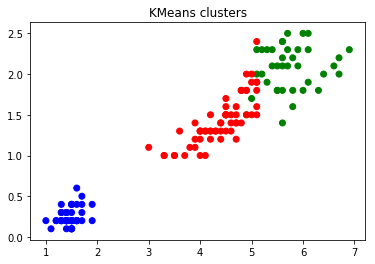

In [14]:
# plot the KMeans clusters
plt.scatter(X[:, 2], X[:, 3], c=pred_colors)
plt.title('KMeans clusters')

#### Existing layout

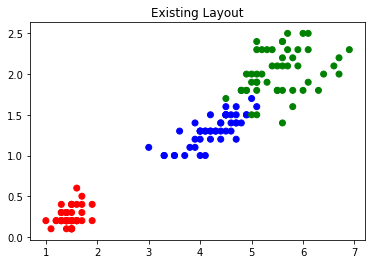

In [15]:
plt.scatter(X[:, 2], X[:, 3], c=actual_colors)
plt.title('Existing Layout')

#### Side-by-side visualization

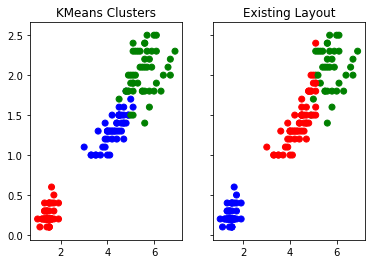

In [16]:
# Two subplots
f, axarr = plt.subplots(1, 2, sharey=True)

axarr[0].scatter(X[:, 2], X[:, 3], c=actual_colors)
axarr[0].set_title('KMeans Clusters')

axarr[1].scatter(X[:, 2], X[:, 3], c=pred_colors)
axarr[1].set_title('Existing Layout')

# http://matplotlib.org/examples/pylab_examples/subplots_demo.html

### Clustering employees based on salary groups
#### Use case: FInding target audience

In [182]:
# load the dataset
salaries_df = pd.read_csv('Salaries.csv')
salaries_df.head()

/Users/vaishaligarg/digitalvidya/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [183]:
# select the columns for clustering
cols = ['BasePay', 'OvertimePay', 'OtherPay']
salaries_df = salaries_df[cols]
salaries_df.head()


,BasePay,OvertimePay,OtherPay
0,167411,0,400184
1,155966,245132,137811
2,212739,106088,16452.6
3,77916,56120.7,198307
4,134402,9737,182235


In [186]:
salaries_df.isnull().any()
salaries_df.dtypes
salaries_df['OvertimePay'].str.contains('$').any()

True

In [160]:
# [A-Za-z]+ - alphabets
# \d+ - numbers
#  \w+ - alpha-numeric
# \W+ - characters

#### KMeans clusters

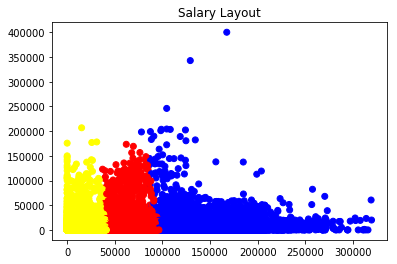

In [165]:
# extract all numbers and discard others
salaries_df = salaries_df.astype(str)
for col in cols:
    salaries_df[col] = salaries_df[col].str.extract('(\d+)', expand = False)
salaries_df.fillna(0, inplace=True)

# create an instance
kmeans = KMeans(n_clusters=3, random_state=0)

# define colors
colors = ['red', 'yellow', 'blue']

# fit the model
kmeans.fit(salaries_df.astype(np.float).values)

# plot the result
pred_colors = [colors[label] for label in kmeans.labels_]
plt.scatter(salaries_df.BasePay, salaries_df.OtherPay, c=pred_colors)
plt.title('Salary Layout')

### Building a KMeans Clustering Model

In [98]:
# load the dataset
wine_df = pd.read_csv('wine.csv')
wine_df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [99]:
# View existing labels
wine_df.Wine.unique()

array([1, 2, 3])

In [100]:
# drop the existing labels
wine_features_df = wine_df.drop('Wine', axis=1)
wine_features_df.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Finding the optimum number of clusters

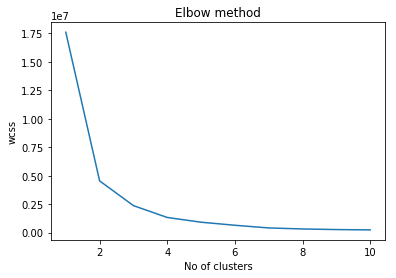

In [167]:
X = wine_df.iloc[:, 1:].values
y = wine_df.iloc[:, 0].values

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #within cluster sum of squares
    
plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('wcss')

In [172]:
KMeans(n_clusters = 1, init = 'k-means++').fit(X).inertia_, KMeans(n_clusters = 2, init = 'k-means++').fit(X).inertia_, KMeans(n_clusters = 3, init = 'k-means++').fit(X).inertia_, KMeans(n_clusters = 4, init = 'k-means++').fit(X).inertia_, KMeans(n_clusters = 5, init = 'k-means++').fit(X).inertia_

(17592296.383508474,
 4543749.6145318616,
 2370689.6867829682,
 1333139.2086165315,
 916379.18715391704)

In [102]:
# create an instance
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

In [103]:
# create random RGB colors for each cluster
colors = np.random.rand(n_clusters, 3) # R-G-B shades
colors

array([[ 0.6428085 ,  0.78774581,  0.65558378],
       [ 0.27640451,  0.59550682,  0.17056674],
       [ 0.15410339,  0.12301101,  0.53419008]])

In [104]:
# fit the model
kmeans.fit(wine_features_df.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [105]:
# assign colors to each KMeans cluster
pred_colors_3 = [colors[label] for label in kmeans.labels_]
pred_colors[:5]

['blue', 'blue', 'blue', 'blue', 'blue']

### Principal Component Analysis

Orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components

    Extract a smaller number of independent variables that explain the most variance of the dataset
    The process works regardless of depedent variable - hence it is un-supervised method.
    Helps with the process of visualizing the result because of reduced number of variables


In [132]:
# Import
from sklearn.decomposition import PCA

# Explained variace with 2,3 and 4 components

PCA(n_components=2).fit(wine_features_df.values).explained_variance_ratio_.sum(), PCA(n_components=3).fit(wine_features_df.values).explained_variance_ratio_.sum(), PCA(n_components=4).fit(wine_features_df.values).explained_variance_ratio_.sum()

(0.99982714611660317, 0.99992210507415469, 0.99997232243033685)

In [133]:
# create an instance
pca = PCA(n_components=2)

# reduce the dimensions of the data using PCA
wine_values = pca.fit_transform(wine_features_df.values)
wine_values[:5]

array([[  3.18562979e+02,   2.14921307e+01],
       [  3.03097420e+02,  -5.36471768e+00],
       [  4.38061133e+02,  -6.53730945e+00],
       [  7.33240139e+02,   1.92729032e-01],
       [ -1.15714285e+01,   1.84899946e+01]])

#### KMeans clusters

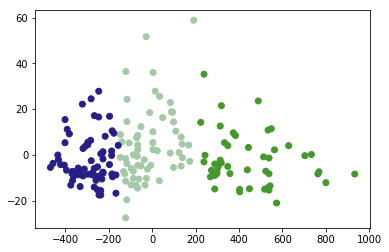

In [134]:
plt.scatter(wine_values[:, 0], wine_values[:, 1], c=pred_colors_3)

#### Existing layout

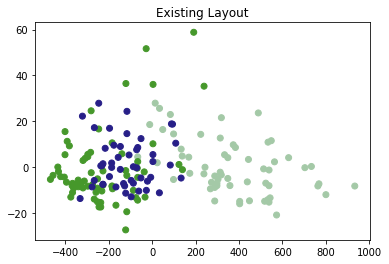

In [135]:
# existing categories
existing_colors = [colors[label-1] for label in wine_df.Wine]

plt.scatter(wine_values[:, 0], wine_values[:, 1], c=existing_colors)
plt.title('Existing Layout')

#### Futher breakdown into clusters

In [136]:
# 6 clusters
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

colors = c=np.random.rand(n_clusters, 3) # R-G-B shades

kmeans.fit(wine_features_df.values)

pred_colors_6 = [colors[label] for label in kmeans.labels_]

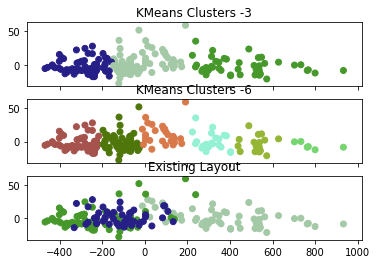

In [137]:
# Two subplots
f, axarr = plt.subplots(3, sharex=True)

axarr[0].scatter(wine_values[:, 0], wine_values[:, 1], c=pred_colors_3)
axarr[0].set_title('KMeans Clusters -3')

axarr[1].scatter(wine_values[:, 0], wine_values[:, 1], c=pred_colors_6)
axarr[1].set_title('KMeans Clusters -6')

axarr[2].scatter(wine_values[:, 0], wine_values[:, 1], c=existing_colors)
axarr[2].set_title('Existing Layout')

## Hierarchical clustering

Build a hierarchy of clusters

    Agglomerative: Bottom up approach. Each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

    Divisive: This is a top down approach. All observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

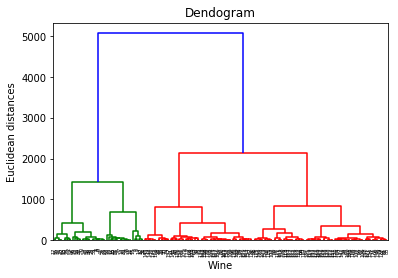

In [138]:
from scipy.cluster.hierarchy import dendrogram, linkage

dendrogram = dendrogram(linkage(wine_features_df.values, method = 'ward')) #ward - minimize variace in each 
plt.title('Dendogram')
plt.xlabel('Wine')
plt.ylabel('Euclidean distances')

In [139]:
# import the module
from sklearn.cluster import AgglomerativeClustering

In [144]:
# create an instance
n_clusters = 3
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

In [145]:
# fit the model
ward.fit(wine_features_df.values)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func=<function mean at 0x102591048>)

In [146]:
# assign colors to each cluster
colors = c=np.random.rand(n_clusters, 3)

pred_colors_3 = [colors[label] for label in ward.labels_]

#### Hierarchical clusters

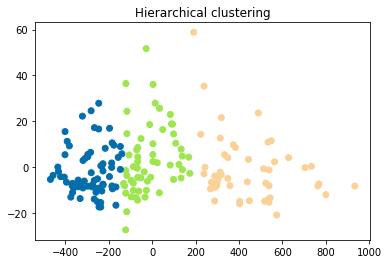

In [147]:
plt.scatter(wine_values[:, 0], wine_values[:, 1], c=pred_colors_3)
plt.title('Hierarchical clustering')

## Cross Validation

http://scikit-learn.org/stable/modules/cross_validation.html

Common Problems:

    The results/accuracy may vary depending on the way the training and test data are divided.
    
Solution:

    Ensure that every example from the original dataset has the same chance of appearing in the training and testing set.
    Evaluate the the model in practice and ensure that it is correctly trained without picking up too much noise.

Process of achieving the solution(Cross Validation): 

    Define a dataset to test the model in the training phase - validation set
    Perform multiple rounds of cross validation to reduce variablity.


### Types of Cross Validation:

#### Cross-validation iterators for Identically Distributed data

k-fold cross validation:

    Divide the samples in k groups, called folds. The prediction function is learned using k - 1 folds, and the fold left out is used for test.
    
Repeated K-Fold:

    Repeat K-Fold n times.
    
Leave One Out (LOO):

    Each learning set is created by taking all the samples except one, the test set being the sample left out.
    
Random permutations cross-validation - Shuffle & Split:

    The ShuffleSplit iterator will generate a user defined number of independent train / test dataset splits.
    
#### Cross-validation iterators with stratification based on class labels

Stratified k-fold:

    Variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set.

Stratified Shuffle Split:

    Variation of ShuffleSplit, which returns stratified splits, i.e which creates splits by preserving the same percentage for each target class as in the complete set

In [13]:
df = pd.read_csv('Titanic.csv')
df['age'] = df['age'].fillna(df['age'].mean())
df['sex'] = df['sex'].map({'male': 0, 'female': 1}).astype(int)
df.drop(['ticket', 'name'], axis = 1, inplace = True)
df['fare'] = df['fare'].fillna(df['fare'].median())
df['cabin'].isnull().sum()
df['cabin'] = np.where(df['cabin'].notnull(), 1, 0)
df['embarked'].value_counts()
df['embarked'] = df['embarked'].fillna('S')
df['embarked'] = df['embarked'].map({'S': 0, 'C' : 1, 'Q' : 2})
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked
0,1,1,1,29.0000,0,0,211.3375,1,0
1,1,1,0,0.9167,1,2,151.5500,1,0
2,1,0,1,2.0000,1,2,151.5500,1,0
3,1,0,0,30.0000,1,2,151.5500,1,0
4,1,0,1,25.0000,1,2,151.5500,1,0


In [14]:
X = df.iloc[:, [0, 2,3,4,5,6,7,8]].values
y = df.iloc[:, 1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

#Fitting logistic regression to training set

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.79573170731707321

In [15]:
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv=10) #cv = number of folds
scores

array([ 0.81818182,  0.80612245,  0.78571429,  0.76530612,  0.82653061,
        0.71428571,  0.7244898 ,  0.80612245,  0.82653061,  0.81632653])

In [16]:
print('mean score of the model', scores.mean())
print('minimum score the model hits', scores.min())
print('maximum score the model hits', scores.max())


mean score of the model 0.788961038961
minimum score the model hits 0.714285714286
maximum score the model hits 0.826530612245


In [26]:
# Stratified shuffle split 

X = df.iloc[:, [0, 2,3,4,5,6,7,8]].values
y = df.iloc[:, 1].values

# Stratified Split of train and test data
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test) 

    from sklearn.linear_model import LogisticRegression
    logreg = LogisticRegression(random_state = 0)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)

    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)

0.763358778626
0.770992366412
0.786259541985
0.797709923664
0.80534351145
0.770992366412
0.748091603053
0.778625954198
0.80534351145
0.767175572519


## Grid Search

    Create a set of models with different parameters. 
    Train each of these models and evaluate it using cross-validation. 
    Select the one that performed best

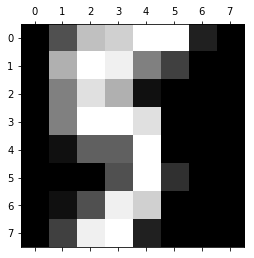

In [44]:
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn import datasets

digits = datasets.load_digits() 
#http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py

# view the data images
import matplotlib.pyplot as plt 
plt.matshow(digits.images[15]) 

In [49]:
X = digits.data
y = digits.target

clf_ = SVC(kernel='rbf')
Cs = [1, 10, 100, 1000]
Gammas = [0.1, 0.01, 0.001, 0.0001]
grid = GridSearchCV(clf_,
            dict(C=Cs,
                 gamma=Gammas),
                 cv=2,
                 pre_dispatch='1*n_jobs',
                 n_jobs=1)

grid.fit(X, y)

scores = [x[1] for x in clf.grid_scores_]
scores, grid.best_score_, grid.best_params_

([0.9604897050639956,
  0.9360044518642181,
  0.9627156371730662,
  0.9454646633277685,
  0.9627156371730662,
  0.9465776293823038,
  0.9627156371730662,
  0.9465776293823038],
 0.9627156371730662,
 {'C': 10, 'gamma': 0.001})

In [54]:
iris = pd.read_csv('iris.csv')
iris['species'] = iris['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.ensemble import RandomForestClassifier
rm_clf = RandomForestClassifier(n_estimators=5)

rm_clf.fit(X_train, y_train)

# predict the outcome for testing data
predictions = rm_clf.predict(X_test)
predictions.shape

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rm_clf, X_train, y_train, cv=5)
scores

array([ 0.92      ,  0.92      ,  1.        ,  0.95833333,  0.90909091])

In [55]:
parameters = [
    {
        "n_estimators":[5, 10, 20, 50, 100]
    }
]

In [56]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(rm_clf, parameters, cv=5, scoring="accuracy", verbose=5, n_jobs=4)

grid.fit(X_train, y_train)
scores = [x[1] for x in clf.grid_scores_]
scores, grid.best_score_, grid.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=5 ..................................................
[CV] n_estimators=5 ..................................................
[CV] n_estimators=5 ..................................................
[CV] n_estimators=5 ..................................................
[CV] ....................... n_estimators=5, score=0.96, total=   0.0s
[CV] ........................ n_estimators=5, score=1.0, total=   0.1s
[CV] n_estimators=5 ..................................................
[CV] n_estimators=10 .................................................
[CV] ....................... n_estimators=5, score=0.92, total=   0.1s
[CV] n_estimators=10 .................................................
[CV] ...................... n_estimators=5, score=0.875, total=   0.2s
[CV] n_estimators=10 .................................................
[CV] ......... n_estimators=5, score=0.9090909090909091, total=   0.1s
[CV] n_estimators

[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.8s


[CV] ...................... n_estimators=50, score=0.92, total=   0.5s
[CV] n_estimators=50 .................................................
[CV] ...................... n_estimators=50, score=0.92, total=   0.5s
[CV] n_estimators=100 ................................................
[CV] ........ n_estimators=50, score=0.9166666666666666, total=   0.6s
[CV] n_estimators=50 .................................................
[CV] ....................... n_estimators=50, score=1.0, total=   0.5s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=4)]: Done  18 out of  25 | elapsed:    1.6s remaining:    0.6s


[CV] ..................... n_estimators=100, score=0.92, total=   1.0s
[CV] n_estimators=100 ................................................
[CV] ........ n_estimators=50, score=0.9090909090909091, total=   0.4s
[CV] ...................... n_estimators=100, score=1.0, total=   0.9s
[CV] n_estimators=100 ................................................
[CV] ....... n_estimators=100, score=0.9090909090909091, total=   0.7s
[CV] ..................... n_estimators=100, score=0.92, total=   0.6s
[CV] ....... n_estimators=100, score=0.9583333333333334, total=   0.6s


[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    2.7s finished
/Users/vaishaligarg/digitalvidya/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([0.94999999999999996,
  0.93333333333333335,
  0.93333333333333335,
  0.93333333333333335,
  0.94166666666666665],
 0.94166666666666665,
 {'n_estimators': 20})